In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.shape

(5572, 5)

In [4]:
#1 Data Cleaning
#2 EDA
#3 Text pre-processing
#4 Model building
#5 Evaluation
#6 Improvement
#7 Website
#8 Deploy

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
5246,ham,Haven't eaten all day. I'm sitting here starin...
4536,ham,Normally i use to drink more water daily:)
2702,ham,"Omw back to tampa from west palm, you hear wha..."
488,ham,Depends on quality. If you want the type i sen...
983,ham,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...


In [8]:
#renaiming the columns
df.rename(columns={'v1':'target' , 'v2':'text'},inplace=True)
df.sample(5)

,target,text
3277,ham,What happened in interview?
2345,ham,"Hi this is yijue, can i meet u at 11 tmr?"
375,ham,Can you say what happen
2685,spam,URGENT! We are trying to contact U. Todays dra...
3733,ham,"4 tacos + 1 rajas burrito, right?"


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
encoder.fit_transform(df['target'])
#ham assigned 0 value, spam assigned 1 value

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2) EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

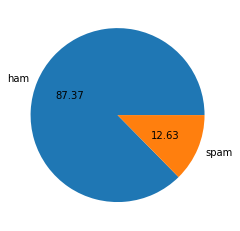

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#Data is imbalanced

In [22]:
import nltk

In [23]:
df['text'].apply(len) 
# len means no of characters

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#no of words
df['text'].apply(lambda x:nltk.word_tokenize(x)) # every sms breaks word by word and comes in form of list
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [27]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
#no of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#for ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

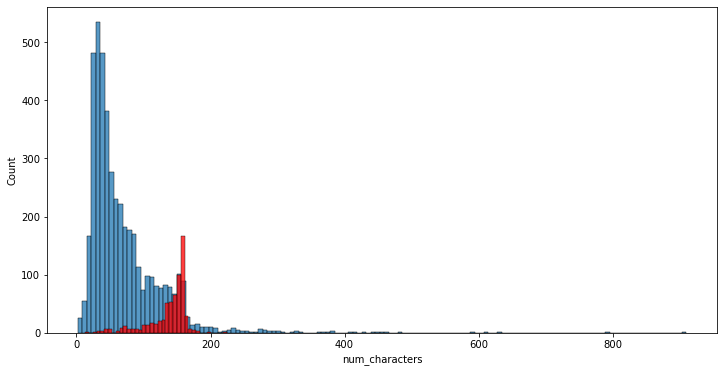

In [34]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='num_words', ylabel='Count'>

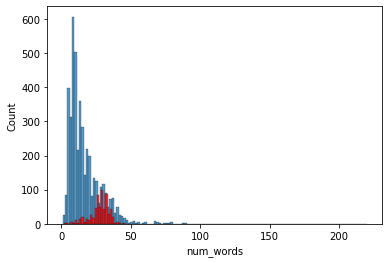

In [36]:

sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

In [37]:
import seaborn as sns

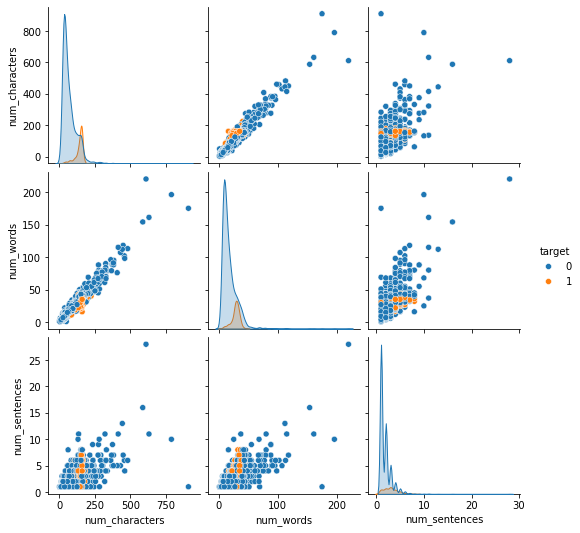

In [38]:
sns.pairplot(df,hue='target')#points will be covered based on hue

<AxesSubplot:>

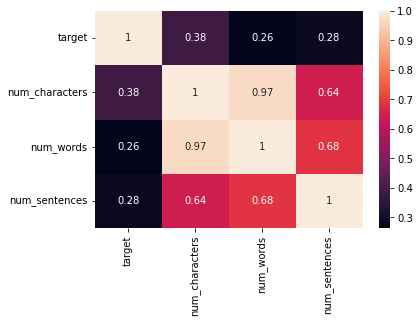

In [39]:
#correlations
d = df.select_dtypes(exclude=[object]) # will select only numerical columns from my dataframe
d.corr()
sns.heatmap(d.corr(),annot=True)

In [40]:
#w.r.t target,num_characters has highest correlation with target i.e. 0.38

# 3)Data Pre-processing

-  Lower case
-  Tokenization (break into words)
-  Removing special characters
-  Removing stop words(words which help in sentence formation like is,or,the) and punctuation marks
-  Stemming(one type of words like dance,danicing=>dance)

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [44]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text) #now text has converted into a list
    y=[]
    for i in text:
        if i.isalnum(): #because we only need alphanumeric characters , we have to remove special characters
            y.append(i)
        
        text=y[:] #cloning list in text
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
        text=y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
            
            
    return " ".join(y) #changing list to string

In [45]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [46]:
df['transformed_text']=df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
#we will use target,transformed_text columns

In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9930

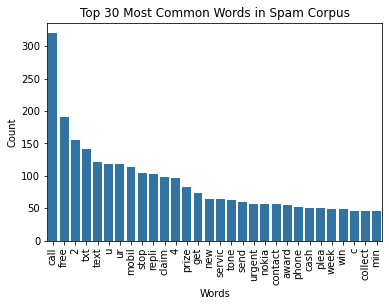

In [51]:
from collections import Counter
#Counter used to get 30 most common words and their counts
most_common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()
        

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

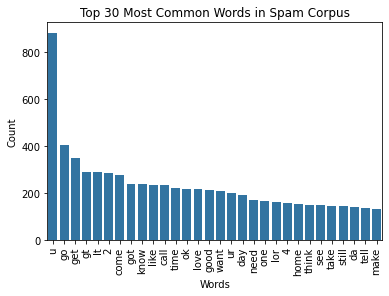

In [53]:
from collections import Counter
#Counter used to get 30 most common words and their counts
most_common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()
        

# 4)Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [55]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5169, 6672)

In [58]:
y=df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [73]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9661508704061895
[[873  23]
 [ 12 126]]
0.8456375838926175


In [74]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [82]:
#tfidf -->mnb
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [83]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [86]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [87]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [88]:
#this time precison came to 1.0 => this is best because precission matters more than accuracy